# Plotting Figure 2 of DynX Data
> Shape optimization for Slit Duct

**Info**:
- the data for this figure is build in dynX and helmX

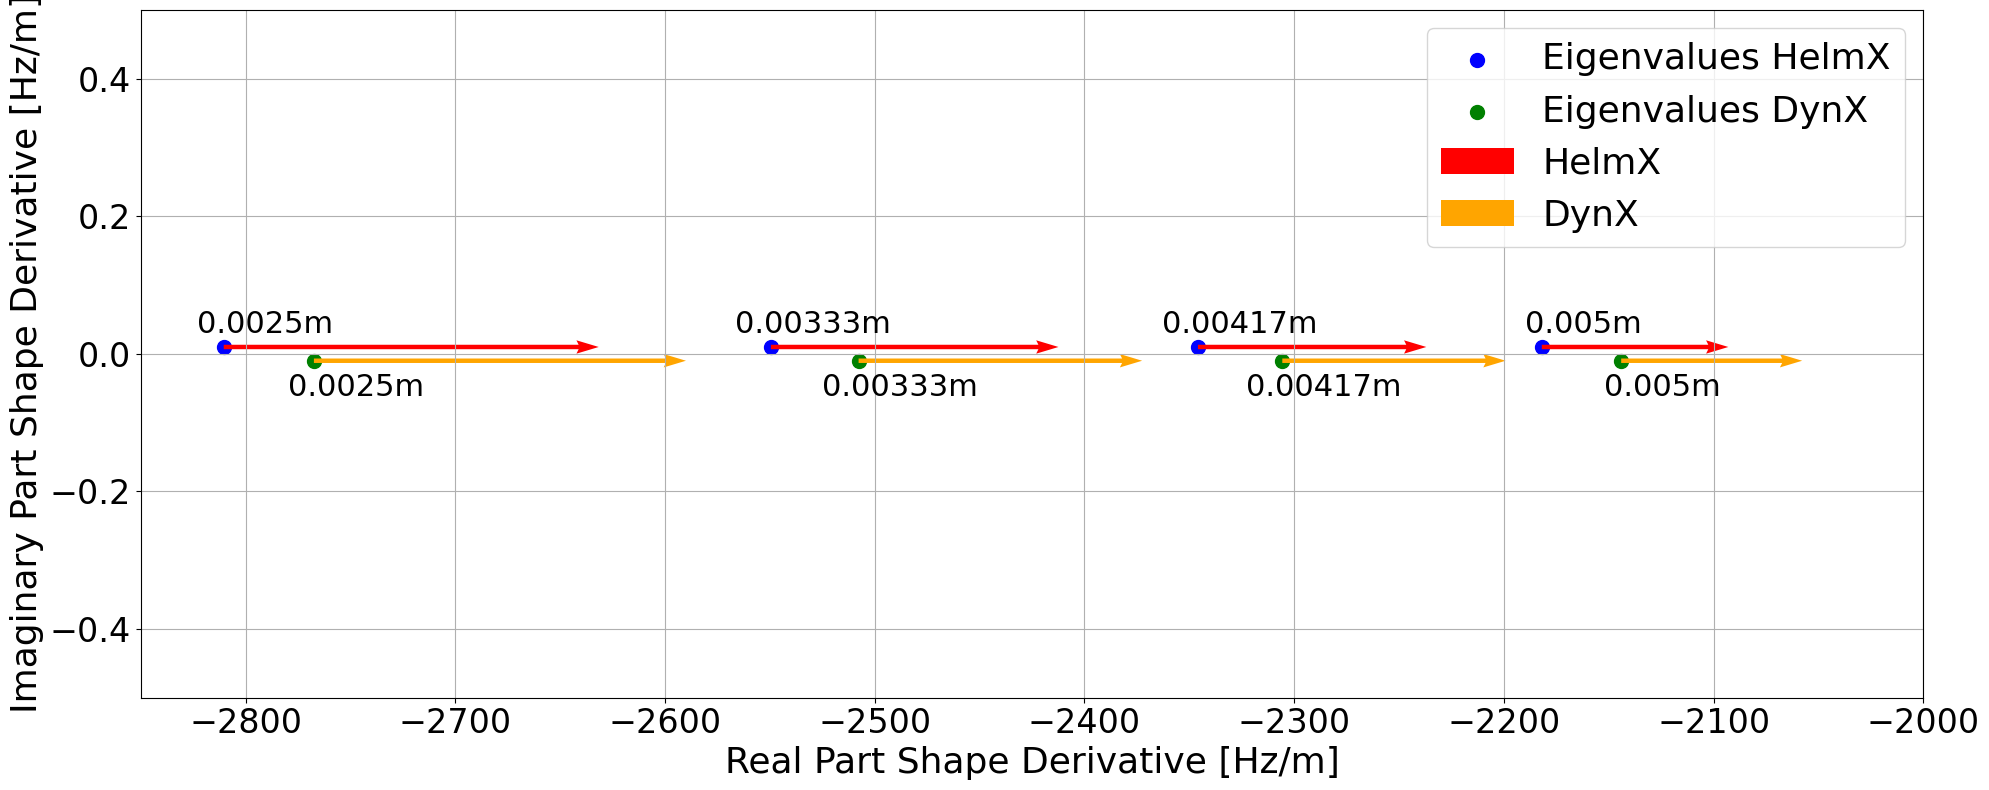

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os

# set path to data
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('dynx_data_fig2.txt')

# read file
with open(file, 'r') as f:
    lines = f.readlines()

# create empty lists to store the data
duct = []
eigenvalues_helmX = []
helmx = []
eigenvalues_dynX = []
dynx = []
# no, re, re, im, no
# read the data from the file
# Read the first paragraph
for line in lines[1:]:
    if line.strip() == '':  # Check for an empty line indicating the paragraph break
        break
    parts = line.strip().split(',')
    duct.append(round(float(parts[0]), 5))
    eigenvalues_helmX.append(complex(parts[1]))
    helmx.append(complex(parts[2]))

# Read the second paragraph
for line in lines[len(duct) + 2:]:  # Skip the first paragraph and the empty line
    parts = line.strip().split(',')
    eigenvalues_dynX.append(complex(parts[1]))
    dynx.append(complex(parts[2]))

# transform the lists into numpy arrays to perform operations
duct = np.array(duct)
eigenvalues_helmX = np.array(eigenvalues_helmX)
eigenvalues_dynX = np.array(eigenvalues_dynX)
helmx = np.array(helmx)
dynx = np.array(dynx)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 8))
offset = 0.01
# Plot eigenvalues on the complex plane
ax.scatter(eigenvalues_helmX.real, eigenvalues_helmX.imag+offset, s=100 ,color='blue', label='Eigenvalues HelmX')
ax.scatter(eigenvalues_dynX.real, eigenvalues_dynX.imag-offset, s=100 ,color='green', label='Eigenvalues DynX')

# # Add labels to each point
for i, txt in enumerate(duct):
    ax.annotate(f'{txt}m', (eigenvalues_helmX[i].real, eigenvalues_helmX[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(30,15), ha='center')
# # Add labels to each point
for i, txt in enumerate(duct):
    ax.annotate(f'{txt}m', (eigenvalues_dynX[i].real, eigenvalues_dynX[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(30,-30), ha='center')

scale = 2000
# Add arrows for continuous and discrete shape derivatives
for i in range(len(eigenvalues_helmX)):
    ax.quiver(eigenvalues_helmX[i].real, eigenvalues_helmX[i].imag+offset, helmx[i].real/scale, helmx[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='red', label='HelmX' if i == 0 else "", width=0.0025)

for i in range(len(eigenvalues_dynX)):
    ax.quiver(eigenvalues_dynX[i].real, eigenvalues_dynX[i].imag-offset, dynx[i].real/scale, dynx[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='orange', label='DynX' if i == 0 else "", width=0.0025)
    #ax.quiver(eigenvalues[i].real, eigenvalues[i].imag, dynx[i].real/scale, dynx[i].imag/scale,
    #           angles='xy', scale_units='xy', scale=1, color='green', label='DynX' if i == 0 else "", width=0.0025)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, continuous[i].real/scale, continuous[i].imag/scale, head_width=0.01, head_length=1)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, discrete[i].real/scale, discrete[i].imag/scale, head_width=0.01, head_length=1)

ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-2850, -2000)

# Set the fontsize of the tick labels
ax.tick_params(axis='both', which='major', labelsize=24)
# Set labels and title
ax.set_xlabel('Real Part Shape Derivative [Hz/m]', fontsize=26)
ax.set_ylabel('Imaginary Part Shape Derivative [Hz/m]', fontsize=26)
ax.legend(fontsize=26)
ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
